In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import Image
plt.rcParams['image.cmap'] = 'gray'

(2436, 2623, 4)


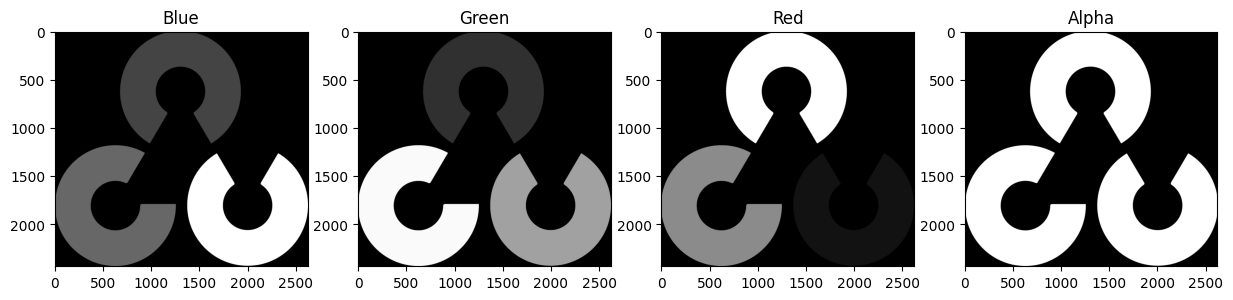

In [2]:
image = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)

print(image.shape)

b, g, r, a = cv2.split(image)

plt.figure(figsize = (15,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');

Shape of the color image:  (640, 640, 3)


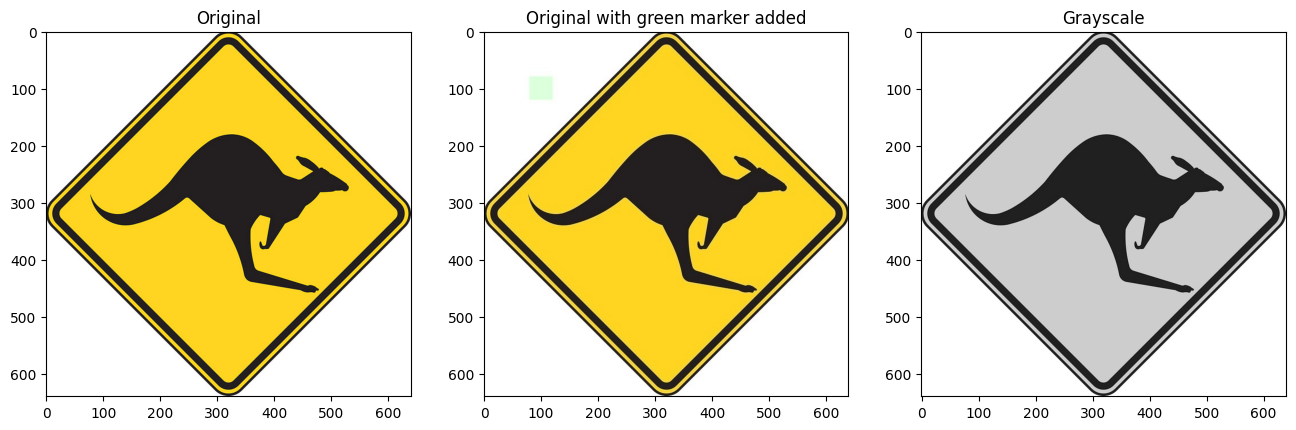

In [5]:
kangaroo_image = cv2.imread('kangaroo.jpg', cv2.IMREAD_COLOR)
kangaroo_with_green_mark_image = cv2.imread('kangaroo_sign_with_green_marker.jpg', cv2.IMREAD_COLOR)

print("Shape of the color image: ", kangaroo_image.shape)

kangaroo_image_grayscale = cv2.cvtColor(kangaroo_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (16,10))
plt.subplot(131); plt.imshow(kangaroo_image[:, :, ::-1]); plt.title('Original')
plt.subplot(132); plt.imshow(kangaroo_with_green_mark_image[:, :, ::-1]);     plt.title('Original with green marker added')
plt.subplot(133); plt.imshow(kangaroo_image_grayscale);            plt.title('Grayscale');

Full inverse mask at (100,100):  0
Semi inverse mask at (100,100):  55


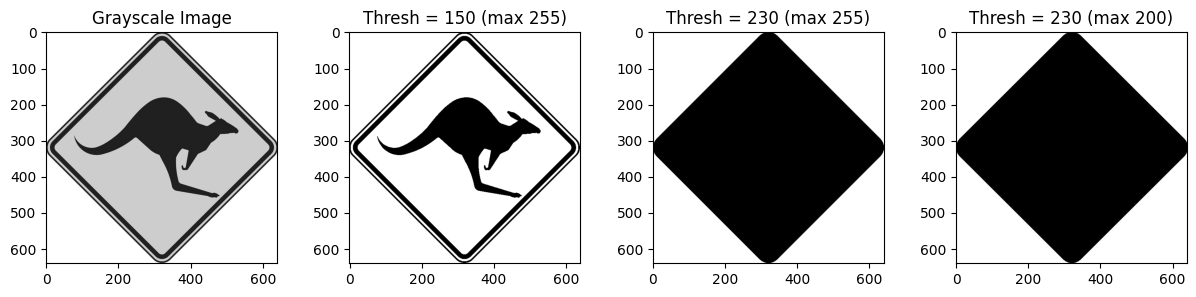

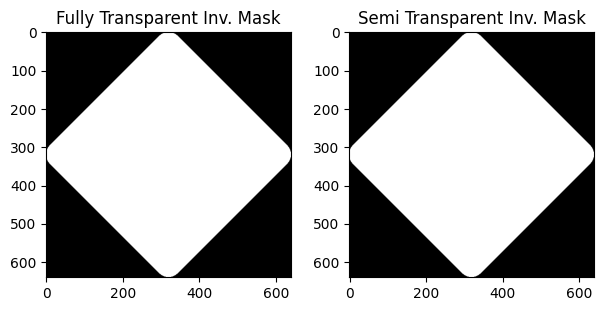

In [9]:
ret1, thresh1 = cv2.threshold(kangaroo_image_grayscale, 150, 255, cv2.THRESH_BINARY)
ret2, thresh2 = cv2.threshold(kangaroo_image_grayscale, 230, 255, cv2.THRESH_BINARY)
ret3, thresh3 = cv2.threshold(kangaroo_image_grayscale, 230, 200, cv2.THRESH_BINARY)

inverted_mask_full = cv2.bitwise_not(thresh2)
inverted_mask_semi = cv2.bitwise_not(thresh3)

print("Full inverse mask at (100,100): ", inverted_mask_full[100,100])
print("Semi inverse mask at (100,100): ", inverted_mask_semi[100,100])

plt.figure(figsize = (15, 3))
plt.subplot(141); plt.imshow(kangaroo_image_grayscale);  plt.title('Grayscale Image')
plt.subplot(142); plt.imshow(thresh1); plt.title('Thresh = 150 (max 255)')
plt.subplot(143); plt.imshow(thresh2); plt.title('Thresh = 230 (max 255)')
plt.subplot(144); plt.imshow(thresh3); plt.title('Thresh = 230 (max 200)')

plt.figure(figsize = (15, 7))
plt.subplot(245); plt.imshow(inverted_mask_full); plt.title('Fully Transparent Inv. Mask')
plt.subplot(246); plt.imshow(inverted_mask_semi); plt.title('Semi Transparent Inv. Mask');

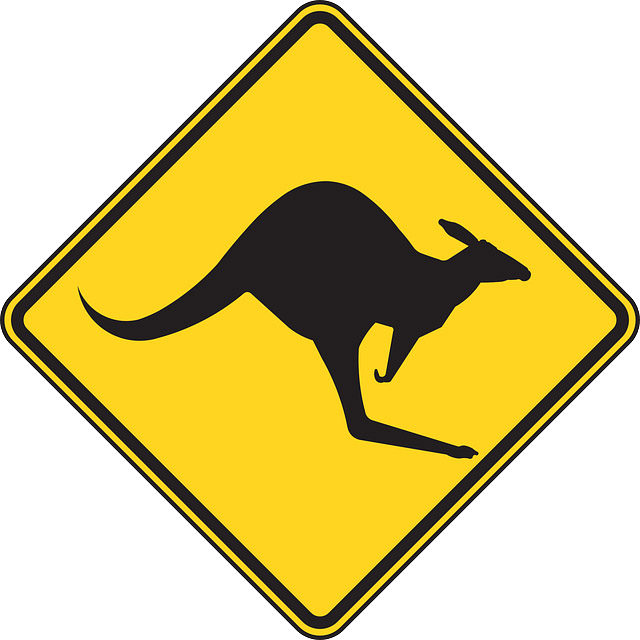

In [11]:
# Fully transparent PNG
bk, gk, rk = cv2.split(kangaroo_image)

matrix = [bk, gk, rk, inverted_mask_full]

transparent_kangaroo = cv2.merge(matrix)

cv2.imwrite('transparent_kangaroo.png', transparent_kangaroo)

Image(filename='transparent_kangaroo.png')

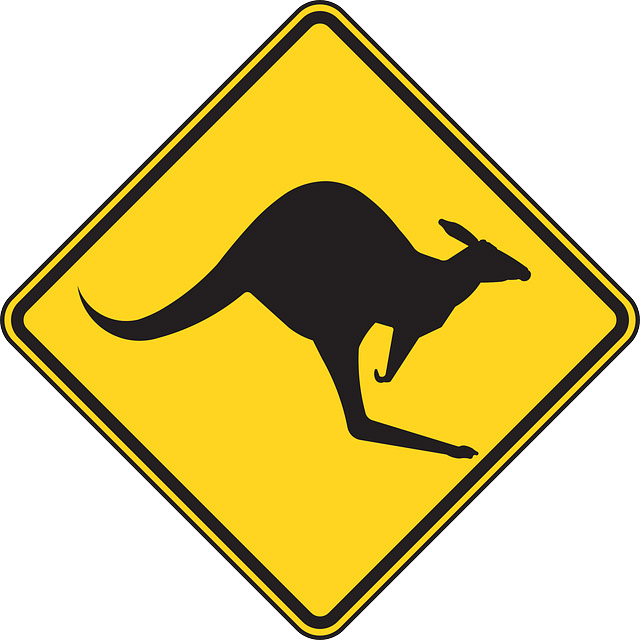

In [12]:
bg, gk, rk = cv2.split(kangaroo_image)

matrix = [bk, gk, rk, inverted_mask_semi]

kangaroo_semi = cv2.merge(matrix)

cv2.imwrite('kangaroo_alpha_semi.png', kangaroo_semi)
Image(filename = "kangaroo_alpha_semi.png", width = '300')

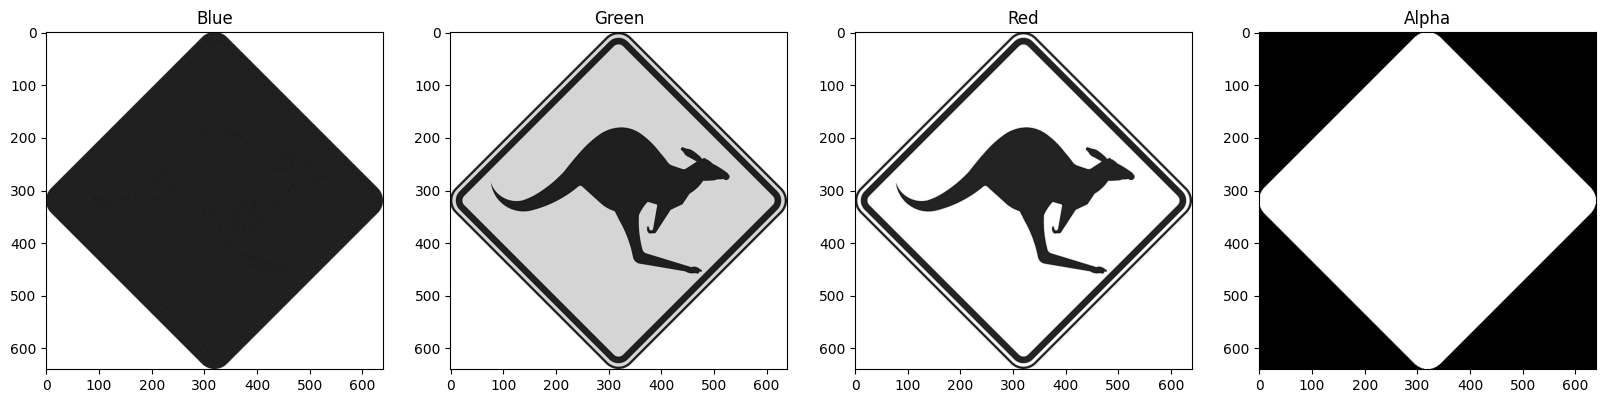

In [13]:
img = cv2.imread('transparent_kangaroo.png', cv2.IMREAD_UNCHANGED)

# Split the channels.
b, g, r, a = cv2.split(img)

# Display each of the channels.
plt.figure(figsize = (20,15))
plt.subplot(141); plt.imshow(b); plt.title('Blue')
plt.subplot(142); plt.imshow(g); plt.title('Green')
plt.subplot(143); plt.imshow(r); plt.title('Red')
plt.subplot(144); plt.imshow(a); plt.title('Alpha');